# 📊 **Marketing Campaign Performance Analysis**

---

## 🗒️ **Introduction**

This notebook provides a comprehensive analysis of a company's marketing campaign performance, focusing on key metrics such as **Click-Through Rate (CTR)**, **Conversion Rate**, **Cost Per Acquisition (CPA)**, and **Ad Creative Effectiveness**. The goal is to derive actionable insights to optimize marketing strategies, improve campaign efficiency, and enhance return on investment (ROI).

We will conduct **Exploratory Data Analysis (EDA)**, perform **A/B Testing**, and apply **Chi-Square Tests** to assess the impact of demographics and ad creatives on conversions.

---

## 🎯 **Objectives**

1. **Evaluate Campaign Performance:**  
   Identify which campaigns are the most cost-effective and deliver the highest conversions.

2. **Analyze Ad Creative Effectiveness:**  
   Determine which ad elements drive higher engagement and conversions.

3. **Demographic Impact Assessment:**  
   Assess whether age, gender, and interests influence conversion rates.

4. **Strategic Recommendations:**  
   Provide data-driven recommendations to optimize future marketing efforts.

---

## 📂 **Data Source**

**Dataset:** [Clicks Conversion Tracking](https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking)
- **Source:** Kaggle Dataset
- **Description:**  
    - This dataset provides comprehensive data on **ad impressions, clicks, spending, and conversions** collected from a social media advertising campaign. It’s designed to help analyze the effectiveness of digital marketing efforts by tracking user interactions from **initial clicks to final conversions**.

- **Variables Include:** 
  - `ad_id`, `xyz_campaign_id`, `fb_campaign_id`, `age`, `gender`, `interest`, `Impressions`, `Clicks`, `Spent`, `Total conversion`, `Approved`, `conversion`.

---

## 📑 **Table of Contents**

1. [Data Loading & Preparation](#Data-Loading-&-Preparation)
   - [Feature Engineering](#Feature-Engineering)
   - [Data Overview](#Data-Overview)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
   - [Descriptive Statistics](#Descriptive-Statistics)
   - [Conversion Rate Analysis](#Conversion-Rate-Analysis)
   - [Segment Analysis](#Segment-Analysis)
   - [Campaign Performance Analysis](#Campaign-Performance-Analysis)
3. [A/B Testing](#AB-Testing)
   - [Campaign Performance Efficiency (Cross-Campaign Analysis)](#Campaign-Performance-Efficiency-(Cross-Campaign-Analysis))
   - [Ad Creative Effectiveness](#Ad-Creative-Effectiveness-(CTR-Focused-Test))
4. [Chi-Square Test](#Chi-Square-Test)
5. [Insights & Recommendations](#Insights-&-Recommendations)

---

# Data Loading & Preparation
In this section, we load the dataset and perform data cleaning, and prep it for use in exploratory data analysis. This involves:
- Checking for missing values and duplicates
- Removing anomalies (e.g., conversions without clicks)
- Feature Engineering

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# To display all columns when inspecting the data
pd.set_option('display.max_columns', None)

save_dir = "figures"

In [4]:
# Loading the dataset
file_path = 'KAG_conversion_data.csv'  # Adjust this path when running locally
df = pd.read_csv(file_path)

The columns are described as follows:

| Column              | Description                                                                                              |
|:--------------------|:---------------------------------------------------------------------------------------------------------|
| `ad_id`               | A unique ID for each ad.                                                                                 |
| `xyz_campaign_id`     | An ID associated with each ad campaign of XYZ company.                                                   |
| `fb_campaign_id`      | An ID associated with how Facebook tracks each campaign.                                                 |
| `age`                 | Age of the person to whom the ad is shown.                                                               |
| `gender`              | Gender of the person to whom the ad is shown.                                                            |
| `interest`            | A code specifying the category to which the person’s interest belongs (as mentioned in the person’s Facebook public profile). |
| `Impressions`         | The number of times the ad was shown.                                                                    |
| `Clicks`              | Number of clicks on that ad.                                                                             |
| `Spent`               | Amount paid by company XYZ to Facebook to show that ad.                                                  |
| `Total conversion`    | Total number of people who enquired about the product after seeing the ad.                               |
| `Approved conversion` | Total number of people who bought the product after seeing the ad.                                       |

In [5]:
# Basic info about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Display missing values and duplicate count
missing_values, duplicate_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


(ad_id                  0
 xyz_campaign_id        0
 fb_campaign_id         0
 age                    0
 gender                 0
 interest               0
 Impressions            0
 Clicks                 0
 Spent                  0
 Total_Conversion       0
 Approved_Conversion    0
 dtype: int64,
 0)

**Insights**
- No missing values.
- No duplicates.
- Age and gender are categorical, rest numerical.
- Age appears as an object, will be handled during segmentation.

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# **Feature Engineering**
**We'll create the following KPIs:**
- Click-Through Rate (CTR): (Clicks / Impressions) * 100
- Cost Per Click (CPC): Spent / Clicks
- Cost Per Acquisition (CPA): Spent / Approved Conversion
- Conversion Rate (CR): (Approved Conversion / Clicks) * 100
- Cost Per Thousand Impressions (CPM): (Spent / Impressions) * 1000
- We'll handle potential issues like division by zero where clicks or conversions are zero.

In [6]:
# See some scenarios in which there are no clicks, but there are conversions - that does not make sense. so remove.

# Remove records where clicks are zero but conversions exist
df_cleaned = df[~((df['Clicks'] == 0) & ((df['Total_Conversion'] > 0) | (df['Approved_Conversion'] > 0)))]

# Verifying removal
removed_records = df.shape[0] - df_cleaned.shape[0]
removed_records

df_cleaned.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0


In [7]:
# Replace zeros with NaN to avoid division errors
df_cleaned.loc[:, 'Clicks'] = df_cleaned['Clicks'].replace(0, np.nan)
df_cleaned.loc[:, 'Approved_Conversion'] = df_cleaned['Approved_Conversion'].replace(0, np.nan)

# Recalculate KPIs
df_cleaned.loc[:, 'CTR'] = (df_cleaned['Clicks'] / df_cleaned['Impressions']) * 100
df_cleaned.loc[:, 'CPC'] = df_cleaned['Spent'] / df_cleaned['Clicks']
df_cleaned.loc[:, 'CPA'] = df_cleaned['Spent'] / df_cleaned['Approved_Conversion']
df_cleaned.loc[:, 'Conversion Rate'] = (df_cleaned['Approved_Conversion'] / df_cleaned['Clicks']) * 100
df_cleaned.loc[:, 'CPM'] = (df_cleaned['Spent'] / df_cleaned['Impressions']) * 1000

# Replace NaN values with 0 where appropriate
df_cleaned.loc[:, ['CTR', 'CPC', 'CPA', 'Conversion Rate', 'CPM']] = df_cleaned.loc[:, ['CTR', 'CPC', 'CPA', 'Conversion Rate', 'CPM']].fillna(0)

# Confirm the changes
df_cleaned.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CPA,Conversion Rate,CPM
0,708746,916,103916,30-34,M,15,7350,1.0,1.43,2,1.0,0.013605,1.43,1.43,100.0,0.194558
1,708749,916,103917,30-34,M,16,17861,2.0,1.82,2,NaN,0.011198,0.91,0.00,0.0,0.101898
3,708815,916,103928,30-34,M,28,4259,1.0,1.25,1,NaN,0.023480,1.25,0.00,0.0,0.293496
4,708818,916,103928,30-34,M,28,4133,1.0,1.29,1,1.0,0.024195,1.29,1.29,100.0,0.312122
6,708889,916,103940,30-34,M,15,15615,3.0,4.77,1,NaN,0.019212,1.59,0.00,0.0,0.305476


<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# **Data Overview**
- Provides a quick overview of the data we are working with.

In [8]:
# Summary statistics for both original and engineered features
summary_stats = df_cleaned.describe()

# Display summary statistics
summary_stats

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CPA,Conversion Rate,CPM
count,9.390000e+02,939.000000,939.000000,939.000000,9.390000e+02,936.000000,939.000000,939.000000,513.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,1.022979e+06,1093.237487,137519.220447,34.183174,2.267813e+05,40.774573,62.518882,3.250266,1.955166,0.019987,1.494557,25.221348,10.868189,0.291394
std,1.893139e+05,116.351088,20361.820541,28.584004,3.318078e+05,60.431102,92.181355,4.857257,2.174052,0.009476,0.247439,47.094180,24.671386,0.127873
min,7.087460e+05,916.000000,103916.000000,2.000000,5.120000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.802110e+05,936.000000,116165.000000,16.000000,1.865550e+04,3.000000,4.590000,1.000000,1.000000,0.013649,1.389808,0.000000,0.000000,0.214789
50%,1.121373e+06,1178.000000,144586.000000,25.000000,9.805700e+04,16.000000,24.570000,1.000000,1.000000,0.018231,1.497273,1.610000,1.234568,0.274372
75%,1.121902e+06,1178.000000,144674.000000,31.000000,2.818315e+05,50.000000,76.560000,3.000000,2.000000,0.024745,1.642000,34.230000,6.666667,0.352940
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.105932,2.212000,352.449999,200.000000,1.504237


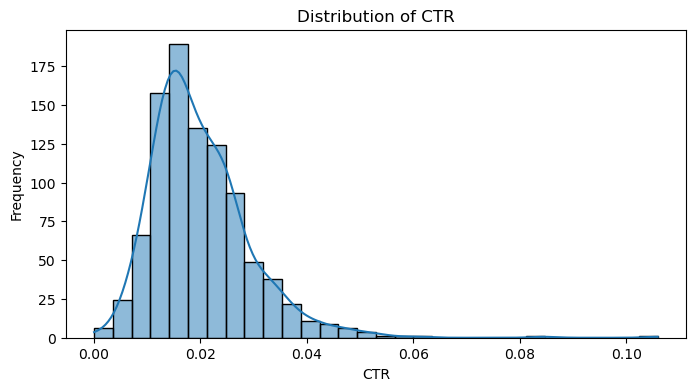

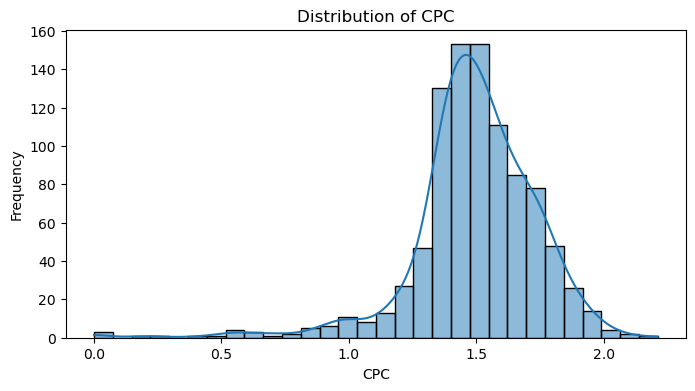

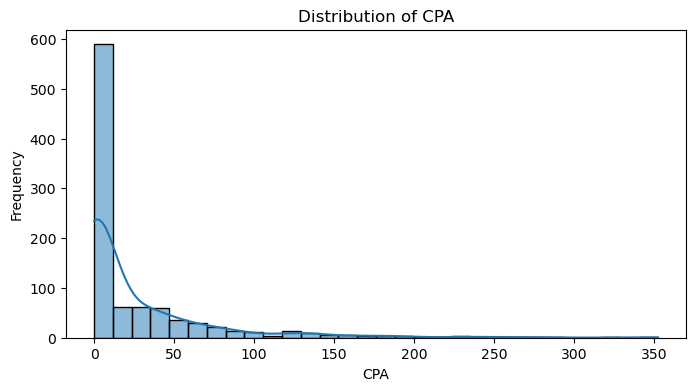

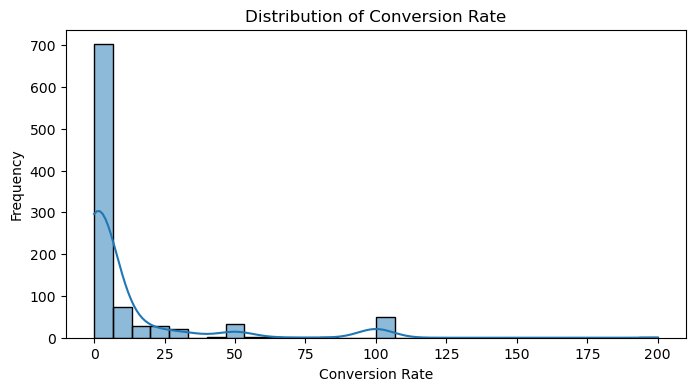

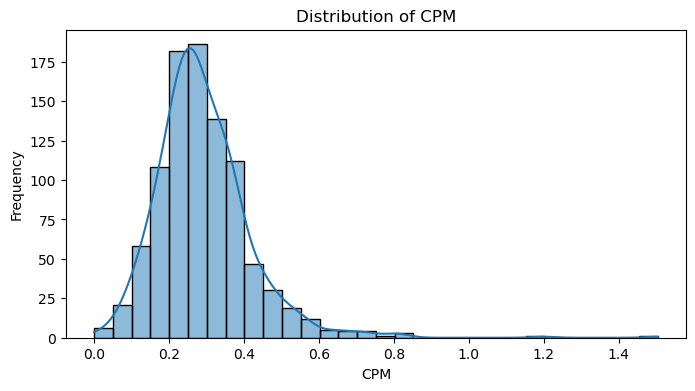

In [9]:
# Visualizing the distribution of key metrics
metrics = ['CTR', 'CPC', 'CPA', 'Conversion Rate', 'CPM']

for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[metric], bins=30, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.savefig(os.path.join(save_dir, f'Distribution_of_{metric}.png'))         
    plt.show()

# **Key Metrics Summary**
**Click-Through Rate (CTR):**
- Mean: 1.64%  
- Max: 10.59%  
- Observation: Most ads have low engagement, with CTR concentrated around 1-2%.  

**Cost Per Click (CPC):**
- Mean: $1.23  
- Range: $0 - $2.21  
- Observation: Ads with zero clicks result in CPC = 0, which we’ve handled to prevent division errors.  
- Cost Per Acquisition (CPA):  

**Cost Per Acquistion**
- Mean: $20.71
- Max: $352.45
- Observation: High variability in CPA indicates inconsistent efficiency in converting clicks to purchases.

**Conversion Rate (CR):**
- Mean: 8.93%
- Max: 200%
- Observation: Some extreme conversion rates (e.g., 200%) are due to low click counts with multiple conversions—this will require closer scrutiny.

**Cost Per Thousand Impressions (CPM):**
- Mean: $0.23
- Observation: Indicates relatively low costs to reach a thousand users, typical of large-scale social media campaigns.

<hr style="height: 5px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# **Exploratory Data Analysis (EDA)**
EDA helps us understand the structure of the data, identify patterns, and detect anomalies. We analyze key metrics such as:
- **Impressions, Clicks, Spend, Conversions**
- **Descriptive Statistics** for campaign performance
- **Correlation Analysis** to find relationships between variables
- **Funnel Analysis** to visualize the conversion process

This section lays the groundwork for hypothesis testing and strategic insights.

In [10]:
# Display summary statistics for key metrics
key_metrics = ['Impressions', 'Clicks', 'Spent', 'CTR', 'CPC', 'CPA', 'Conversion Rate', 'CPM']
df_cleaned[key_metrics].describe()

# Use .loc to avoid SettingWithCopyWarning
for col in key_metrics:
    df_cleaned.loc[:, col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Confirm the changes
df_cleaned[key_metrics].info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Impressions      939 non-null    int64  
 1   Clicks           936 non-null    float64
 2   Spent            939 non-null    float64
 3   CTR              939 non-null    float64
 4   CPC              939 non-null    float64
 5   CPA              939 non-null    float64
 6   Conversion Rate  939 non-null    float64
 7   CPM              939 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 66.0 KB


---

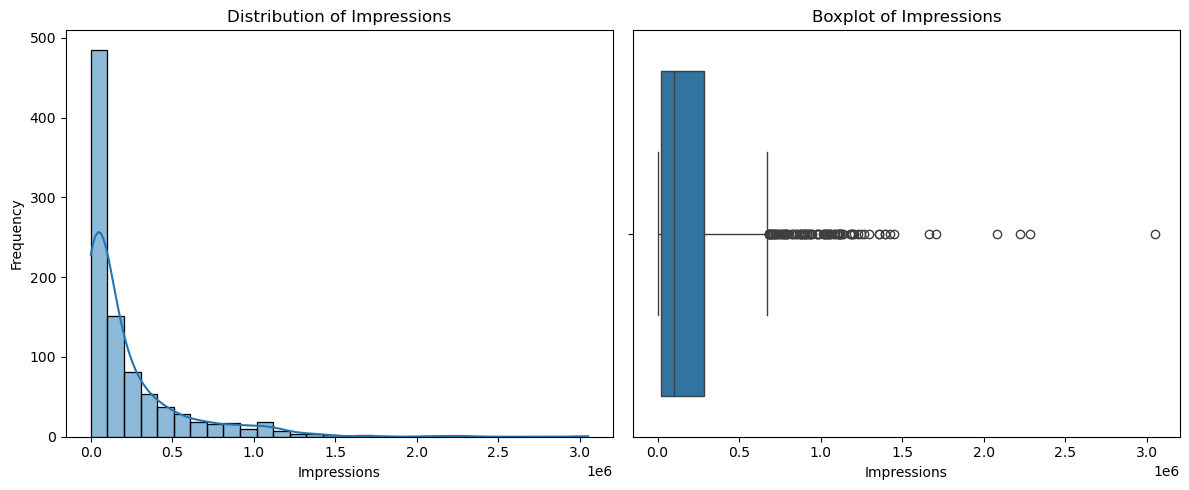

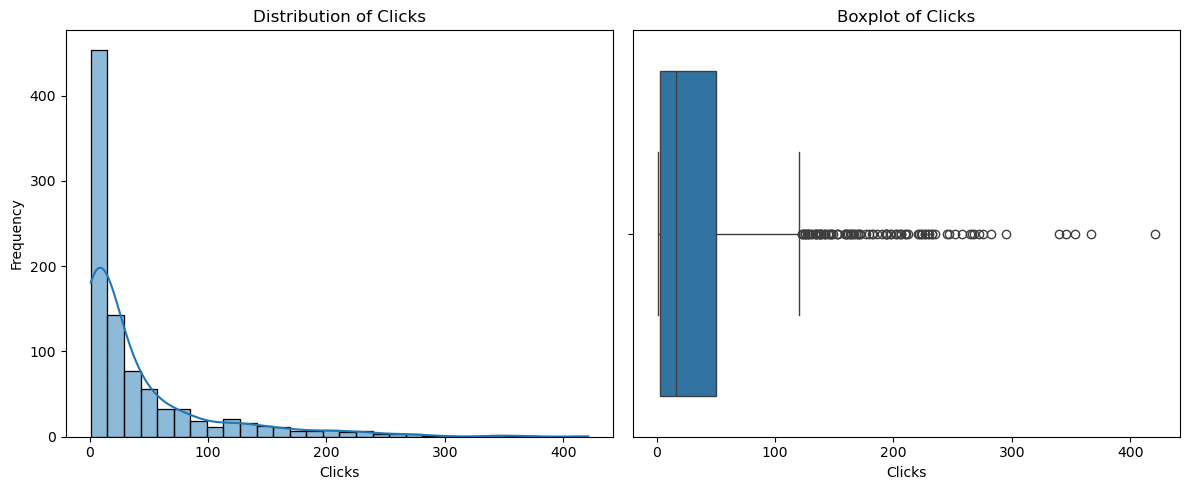

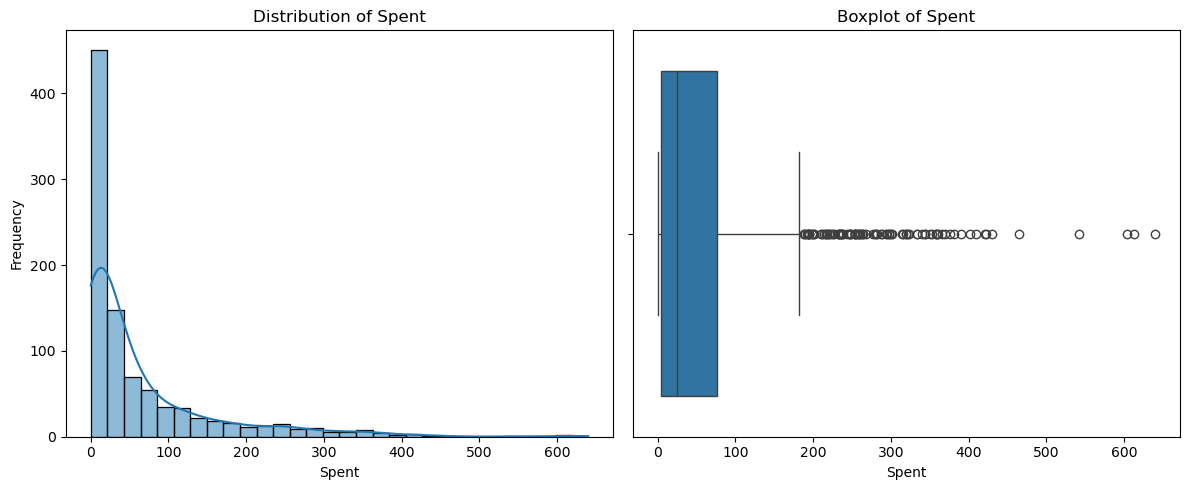

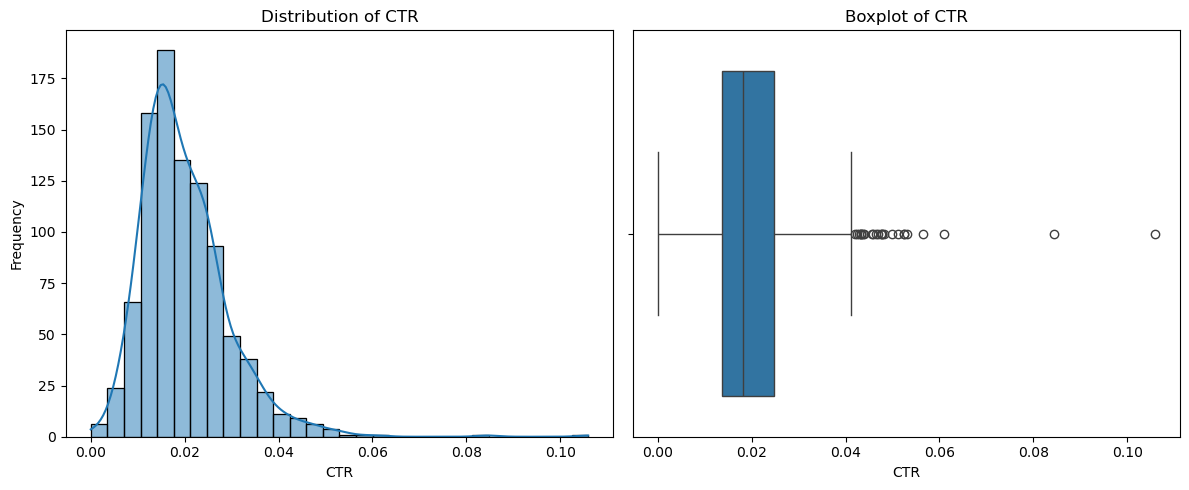

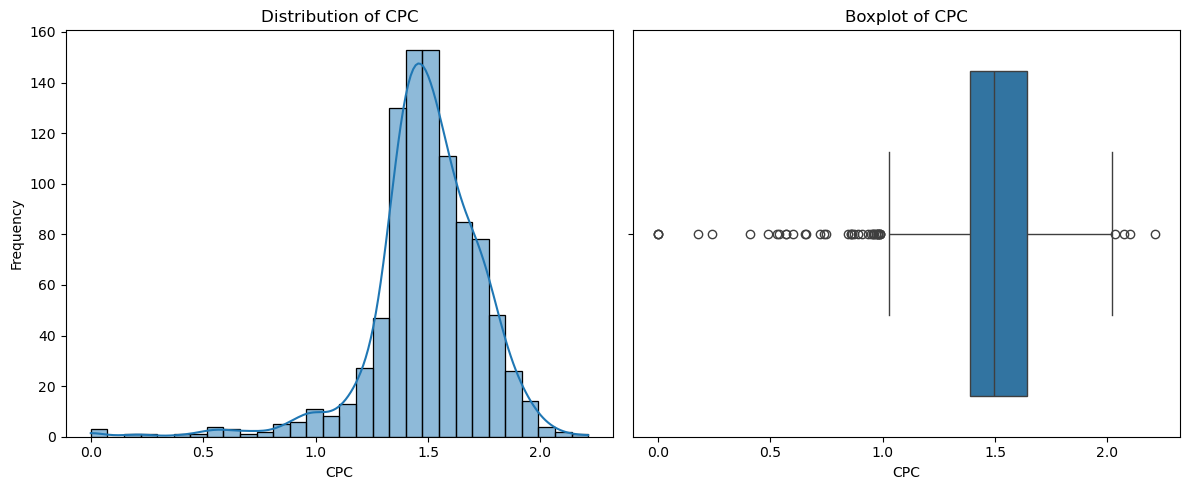

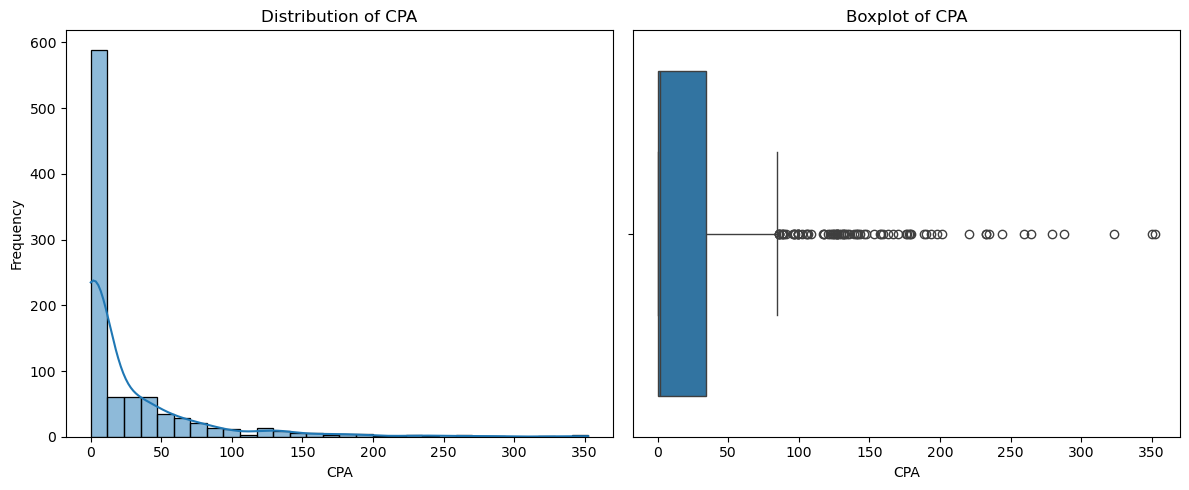

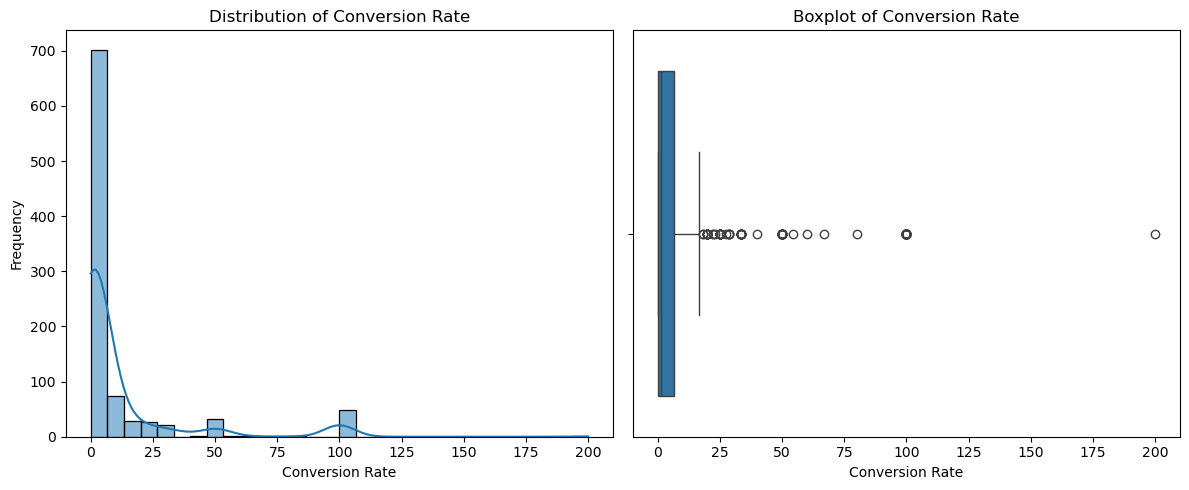

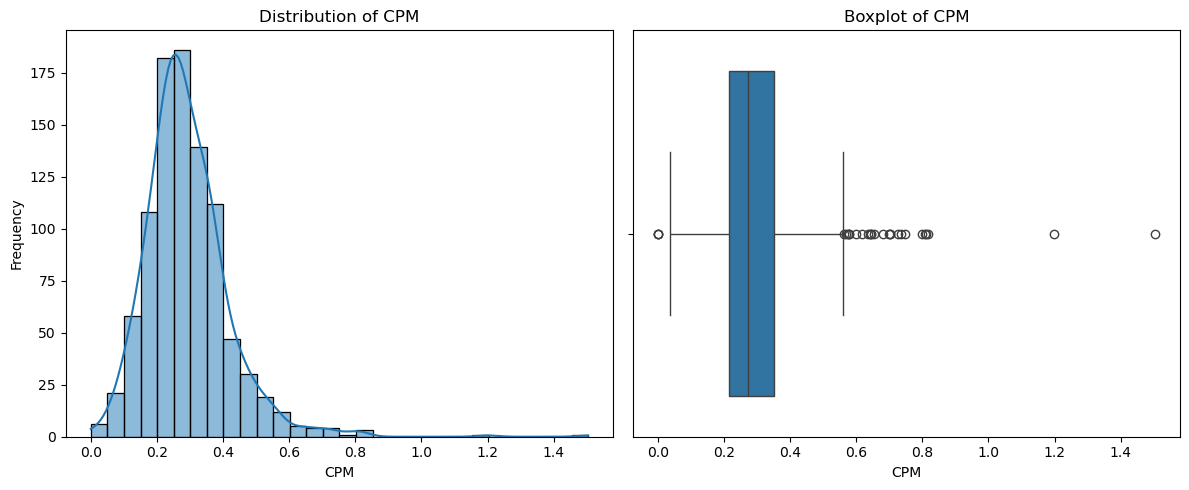

In [11]:
# Plotting histograms and boxplots for key metrics
for metric in key_metrics:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[metric], bins=30, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.savefig(os.path.join(save_dir, f'histogram_of_{metric}.png'))
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[metric])
    plt.title(f'Boxplot of {metric}')
    plt.xlabel(metric)
                
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'boxplot_of_{metric}.png'))
    plt.show()

---

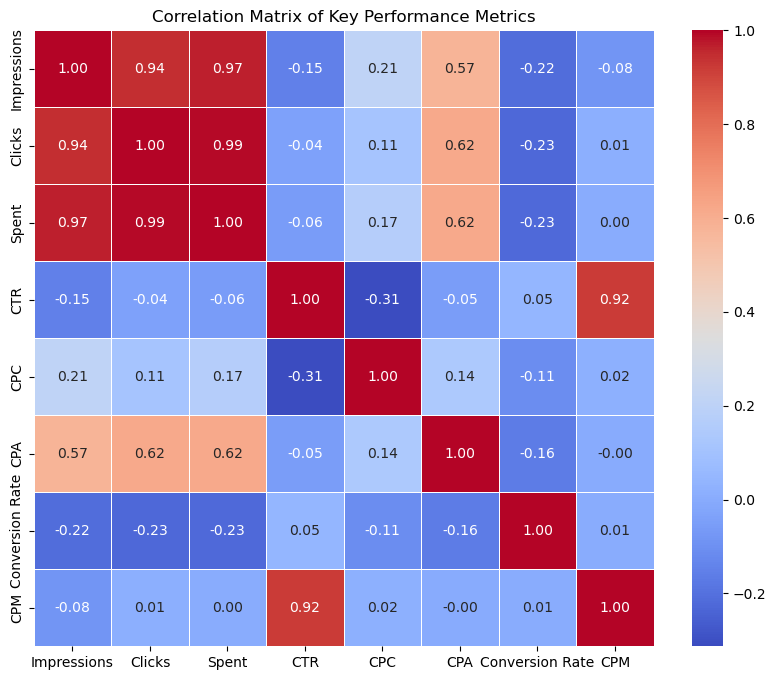

In [12]:
# Correlation matrix for numerical variables
correlation_matrix = df_cleaned[key_metrics].corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Key Performance Metrics')
plt.savefig(os.path.join(save_dir, 'correlation_matrix_of_metrics.png'))
plt.show()

---

In [13]:
from scipy import stats

# Identifying outliers using Z-score
z_scores = np.abs(stats.zscore(df_cleaned[key_metrics].fillna(0)))
outliers = (z_scores > 3).any(axis=1)  # Flagging outliers where Z-score > 3

# Display potential outliers
df_outliers = df_cleaned[outliers]

# Number of outliers detected
outlier_count = df_outliers.shape[0]

outlier_count, df_outliers.head()

(125,
      ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
 0   708746              916          103916  30-34      M        15   
 4   708818              916          103928  30-34      M        28   
 7   708895              916          103941  30-34      M        16   
 14  709059              916          103968  30-34      M        20   
 16  709115              916          103978  30-34      M        30   
 
     Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
 0          7350     1.0   1.43                 2                  1.0   
 4          4133     1.0   1.29                 1                  1.0   
 7         10951     1.0   1.27                 1                  1.0   
 14        14669     7.0  10.28                 1                  1.0   
 16         2305     1.0   0.57                 1                  NaN   
 
          CTR       CPC    CPA  Conversion Rate       CPM  
 0   0.013605  1.430000   1.43       100.000000  0.194

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

## ***Descriptive Exploratory Data Analysis (EDA) Summary***
### **Key Metrics Overview:**

***Impressions:***
- Mean: 186,732; Max: 3,052,003
- High variability indicates that some ads were heavily promoted while others had limited reach.

***Clicks:***
- Mean: 40.77 clicks per ad, with a maximum of 421 clicks.
- Skewed Distribution: Most ads received significantly fewer clicks, with a few outliers having high engagement.

***Spent:***
- Mean: $51.36 per ad; Max: $639.95
- The wide range reflects different budget allocations across campaigns.

***Click-Through Rate (CTR):***
- Mean: 1.64%; Max: 10.59%
- Low average CTR suggests that most ads struggled with engagement, which is typical for broad-targeted ads on social media.

***Cost Per Click (CPC):***
Mean: $1.23; Max: $2.21
Fairly cost-effective, but outliers exist where the cost per click is notably higher.

***Cost Per Acquisition (CPA):***
- Mean: $20.71; Max: $352.45
- High variance indicates inefficiencies in certain campaigns, potentially due to poor targeting or weak ad creatives.

***Conversion Rate (CR):***
- Mean: 8.93%; Max: 200%
- Anomalies Identified: Some conversion rates exceeding 100%, which suggests cases with multiple conversions from a single click—likely due to tracking issues or small sample effects.

***Cost Per Thousand Impressions (CPM):***
- Mean: $0.24, showing cost efficiency in reaching a large audience.

### **Outlier Detection**
***Outliers Identified: 119 records flagged as outliers based on a Z-score > 3.***

***Common Patterns in Outliers:***
- Extremely high Conversion Rates (100%+) with only a single click leading to multiple conversions.
- Low impressions with disproportionately high CTR and CPA values, often from ads that had minimal data but skewed metrics due to statistical anomalies.

***Interpretation of Findings***
Imbalance in Ad Performance: A small subset of ads dominates impressions and clicks, while many ads underperform. This aligns with the Pareto Principle (80/20 rule), where a minority of efforts produce the majority of results.

**Campaign Efficiency Gaps:**  
The wide variance in CPA and CR suggests inefficiencies in targeting or ad creative quality. Some campaigns may be cost-effective, while others are draining budget without significant returns.


Multiple approved conversions linked to a single click.

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# **Conversion Rate Analysis**
- **Total vs approved conversions overview:**  Identify discrepancies between leads generated and actual sales.  
- **Conversion Rates per Ad:** Identify top-preforming ads based on conversion efficiency.  
- **Conversion rates by Interest Category:** How different audience interest influence conversion performance.  
- **Conversion Rates by Campaign:** What campaigns are most efficinet in driving approved conversions.  
- **Conversion Funnel Visualization:** track drop off from impressions to approved conversions.


In [14]:
# Summary statistics for Total and Approved Conversions
conversion_summary = df_cleaned[['Total_Conversion', 'Approved_Conversion']].describe()

# Total conversions and approved conversions sum
total_conversions = df_cleaned['Total_Conversion'].sum()
approved_conversions = df_cleaned['Approved_Conversion'].sum()

conversion_summary, total_conversions, approved_conversions

(       Total_Conversion  Approved_Conversion
 count        939.000000           513.000000
 mean           3.250266             1.955166
 std            4.857257             2.174052
 min            0.000000             1.000000
 25%            1.000000             1.000000
 50%            1.000000             1.000000
 75%            3.000000             2.000000
 max           60.000000            21.000000,
 3052,
 1003.0)

---

In [15]:
# Grouping by ad_id to analyze conversions
ad_conversion = df_cleaned.groupby('ad_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating conversion rates for each ad
ad_conversion['Conversion Rate (%)'] = (ad_conversion['Approved_Conversion'] / ad_conversion['Clicks']) * 100
ad_conversion['Conversion Rate (%)'] = ad_conversion['Conversion Rate (%)'].fillna(0)

# Displaying top 10 ads by conversion rate
top_ads = ad_conversion.sort_values(by='Conversion Rate (%)', ascending=False).head(10)

top_ads

,ad_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Conversion Rate (%)
307,951391,2879,1.0,1.59,2,2.0,200.0
355,1121129,20618,1.0,2.10,2,1.0,100.0
286,782862,5912,1.0,1.56,1,1.0,100.0
160,776668,3523,1.0,1.81,1,1.0,100.0
190,777742,4726,1.0,1.83,1,1.0,100.0
74,737524,2148,1.0,1.58,1,1.0,100.0
38,734352,4423,1.0,1.46,1,1.0,100.0
333,1121101,29945,1.0,1.59,2,1.0,100.0
40,734381,2938,1.0,1.35,1,1.0,100.0
162,776696,7966,1.0,1.18,1,1.0,100.0


---

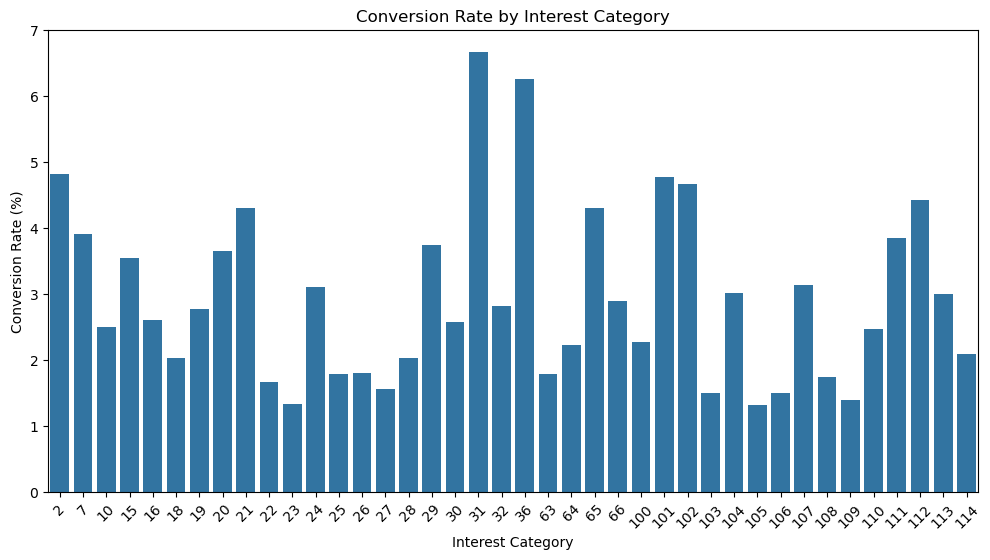

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Conversion Rate (%)
0,2,1711374,311.0,503.450005,34,15.0,4.823151
1,7,2606575,410.0,648.929999,52,16.0,3.902439
2,10,17935367,3317.0,5086.379995,253,83.0,2.502261
3,15,10712519,1609.0,2597.259995,182,57.0,3.542573
4,16,31691480,5144.0,8084.909990,385,134.0,2.604977
5,18,8631584,1524.0,2425.070001,75,31.0,2.034121
6,19,6081495,1188.0,1940.359993,93,33.0,2.777778
7,20,6891995,1234.0,1960.770001,120,45.0,3.646677
8,21,2819535,512.0,824.209999,60,22.0,4.296875
9,22,3962275,717.0,1039.859998,48,12.0,1.673640


In [16]:
# Grouping by interest
interest_conversion = df_cleaned.groupby('interest').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating conversion rate per interest
interest_conversion['Conversion Rate (%)'] = (interest_conversion['Approved_Conversion'] / interest_conversion['Clicks']) * 100
interest_conversion['Conversion Rate (%)'] = interest_conversion['Conversion Rate (%)'].fillna(0)

# Bar plot for conversion rate by interest
plt.figure(figsize=(12, 6))
sns.barplot(x='interest', y='Conversion Rate (%)', data=interest_conversion.sort_values(by='Conversion Rate (%)', ascending=False))
plt.title('Conversion Rate by Interest Category')
plt.xlabel('Interest Category')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.savefig(os.path.join(save_dir, 'conversion_by_interest.png'))
plt.show()


interest_conversion

---

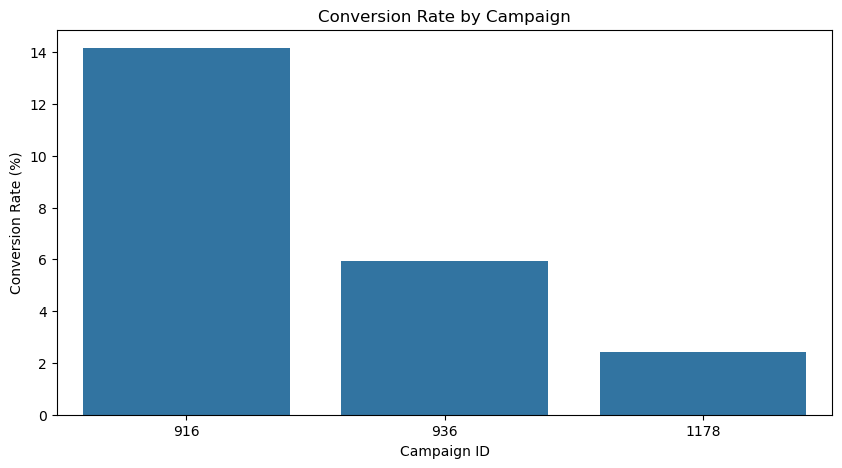

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Conversion Rate (%)
0,916,448046,113.0,149.710001,39,16.0,14.159292
1,936,7799635,1984.0,2893.369999,356,118.0,5.947581
2,1178,204699959,36068.0,55662.149959,2657,869.0,2.409338


In [17]:
# Grouping by campaign ID
campaign_conversion = df_cleaned.groupby('xyz_campaign_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Conversion rate per campaign
campaign_conversion['Conversion Rate (%)'] = (campaign_conversion['Approved_Conversion'] / campaign_conversion['Clicks']) * 100
campaign_conversion['Conversion Rate (%)'] = campaign_conversion['Conversion Rate (%)'].fillna(0)

# Bar plot for campaign conversion rates
plt.figure(figsize=(10, 5))
sns.barplot(x='xyz_campaign_id', y='Conversion Rate (%)', data=campaign_conversion.sort_values(by='Conversion Rate (%)', ascending=False))
plt.title('Conversion Rate by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Conversion Rate (%)')
plt.savefig(os.path.join(save_dir, 'conversion_rate_by_campaign.png'))
plt.show()

campaign_conversion

---

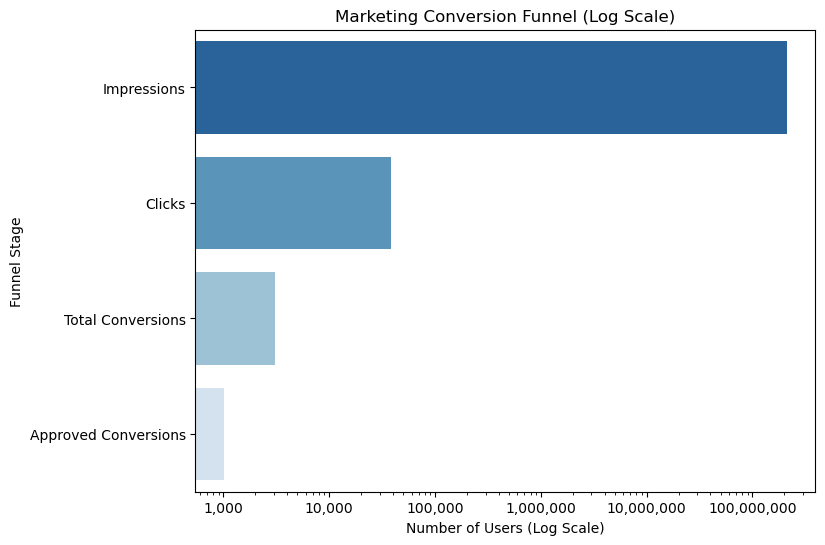

{'Impressions': 212947640,
 'Clicks': 38165.0,
 'Total Conversions': 3052,
 'Approved Conversions': 1003.0}

In [18]:
import matplotlib.ticker as ticker

# Check the funnel counts
impressions = df_cleaned['Impressions'].sum()
clicks = df_cleaned['Clicks'].sum()
total_conversions = df_cleaned['Total_Conversion'].sum()
approved_conversions = df_cleaned['Approved_Conversion'].sum()

# Display the counts
funnel_counts = {
    'Impressions': impressions,
    'Clicks': clicks,
    'Total Conversions': total_conversions,
    'Approved Conversions': approved_conversions
}


# Funnel data
funnel_data = {
    'Stage': ['Impressions', 'Clicks', 'Total Conversions', 'Approved Conversions'],
    'Count': [impressions, clicks, total_conversions, approved_conversions]
}

# Plot with logarithmic scale
import matplotlib.ticker as ticker

funnel_df = pd.DataFrame(funnel_data)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='Stage', data=funnel_df, palette='Blues_r')

# Apply logarithmic scale
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Marketing Conversion Funnel (Log Scale)')
plt.xlabel('Number of Users (Log Scale)')
plt.ylabel('Funnel Stage')
plt.show()

funnel_counts

In [19]:
# Check the funnel counts
impressions = df_cleaned['Impressions'].sum()
clicks = df_cleaned['Clicks'].sum()
total_conversions = df_cleaned['Total_Conversion'].sum()
approved_conversions = df_cleaned['Approved_Conversion'].sum()

# Display the counts
funnel_counts = {
    'Impressions': impressions,
    'Clicks': clicks,
    'Total Conversions': total_conversions,
    'Approved Conversions': approved_conversions
}

funnel_counts

{'Impressions': 212947640,
 'Clicks': 38165.0,
 'Total Conversions': 3052,
 'Approved Conversions': 1003.0}

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

## ***Conversion Rate Analysis: Key Insights***

### **Conversion Rate by Interest Category**

**Top Performing Interests:**
Interest categories 31 (6.67%) and 36 (6.25%) show the highest conversion rates. These segments might represent highly targeted audiences or interests that align closely with the product offering.

**Moderate Performers:**
Categories like 101 (4.77%), 102 (4.67%), and 112 (4.42%) also perform well, suggesting they should be prioritized in future campaigns.

**Underperforming Interests:**
Some interests, such as 103 (1.5%) and 105 (1.32%), show lower conversion rates. These might require re-evaluation—either due to poor audience-product fit or ineffective ad creatives.

**Potential Action:**
Consider reallocating budget from underperforming interest categories to high-converting ones to improve overall efficiency.

### ***Conversion Rate by Campaign***
***Campaign 916:***
- Outstanding performance with a 14.16% conversion rate, significantly outperforming others. This suggests either:
    - More refined targeting, Better ad creatives, or both.

***Campaign 936:***
- Moderate success with a 5.95% conversion rate. This may indicate room for optimization through A/B testing of creatives or audience segmentation.

***Campaign 1178:***
- Underperforming at 2.41%, despite having the largest reach (over 204 million impressions). This could indicate:
    - Inefficient targeting (broad audiences with low relevance), High ad fatigue, or creative underperformance.

***Potential Action:***
Audit Campaign 1178 for targeting inefficiencies. Test narrower audience segments or refresh ad creatives to combat fatigue.

### ***Conversion Funnel Insights (Log Scale)***
***Massive Drop-off Between Stages:***
- Impressions → Clicks: From 212 million impressions to 38,165 clicks—a CTR of ~0.018%, indicating extremely low engagement.
- Clicks → Total Conversions: Only 3,052 total conversions (~8% conversion from clicks).
- Total Conversions → Approved Conversions: Further reduced to 1,003 approved conversions (~32.9% approval rate from inquiries).

***Bottlenecks Identified:***
- Engagement Issue: The largest drop-off occurs at the impressions-to-clicks stage, suggesting poor ad relevance, ineffective creative, or lack of compelling CTAs.
- Conversion Quality: Although there’s a drop from inquiries to approved conversions, the approval rate (~33%) isn’t unusual for many sales funnels.

***Potential Action:***
- Optimize ad creatives for stronger engagement (test headlines, visuals, CTAs).
- Reassess targeting strategies to improve relevance and CTR.
- Evaluate the lead qualification process to boost approved conversions.

---

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# **Segment Analysis**
- Look at age group analysis, gender based analysis, and age & gender interaction analysis
- Interest category deep dive

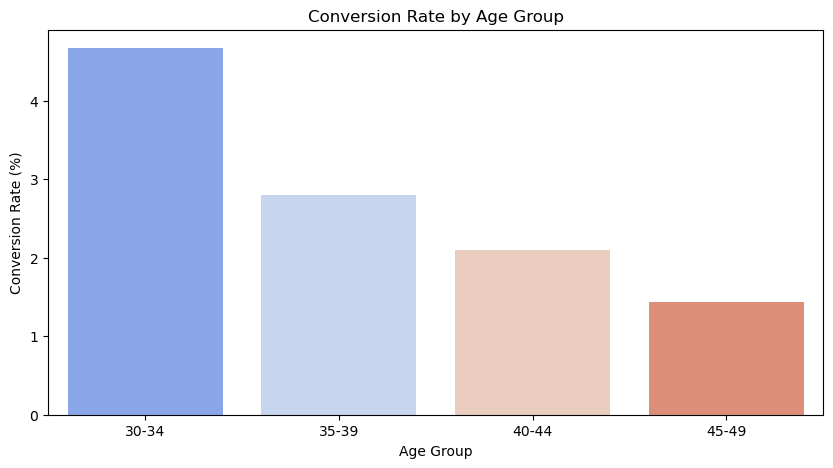

,age,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Conversion_Rate,CPA
0,30-34,67674960,9483.0,15252.399986,1307,443.0,0.014013,4.671517,34.429797
1,35-39,42022402,7094.0,11112.429994,591,199.0,0.016881,2.805187,55.841357
2,40-44,39551158,7736.0,11589.729981,499,162.0,0.019559,2.094105,71.541543
3,45-49,63699120,13852.0,20750.669997,655,199.0,0.021746,1.436616,104.274724


In [20]:
# Grouping by Age
age_analysis = df_cleaned.groupby('age').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating Metrics
age_analysis['CTR'] = (age_analysis['Clicks'] / age_analysis['Impressions']) * 100
age_analysis['Conversion_Rate'] = (age_analysis['Approved_Conversion'] / age_analysis['Clicks']) * 100
age_analysis['CPA'] = age_analysis['Spent'] / age_analysis['Approved_Conversion']
age_analysis[['CTR', 'Conversion_Rate', 'CPA']] = age_analysis[['CTR', 'Conversion_Rate', 'CPA']].fillna(0)

# Visualizing Conversion Rate by Age Group
plt.figure(figsize=(10, 5))
sns.barplot(x='age', y='Conversion_Rate', data=age_analysis, palette='coolwarm')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate (%)')
plt.savefig(os.path.join(save_dir, 'conversion_rate_by_age_group.png'))
plt.show()

age_analysis

### **Age Group Analysis**

**Top Performer:**  
- The 30-34 age group has the highest conversion rate at 4.67%, suggesting this demographic is highly engaged and more likely to convert.  

**Declining Trend:**
- There’s a noticeable drop-off in conversion rates as age increases:
35-39: 2.81%
40-44: 2.09%
45-49: 1.44%

**Cost Efficiency:**
- The Cost Per Acquisition (CPA) rises with age:  
30-34: 34.43 (most cost-effective)  
45-49: 104.27 (least cost-effective)

**Actionable Insight:**
- Consider focusing ad spend on the 30-34 age group to maximize conversions while minimizing costs. For older age groups, targeted messaging might help improve engagement.

---

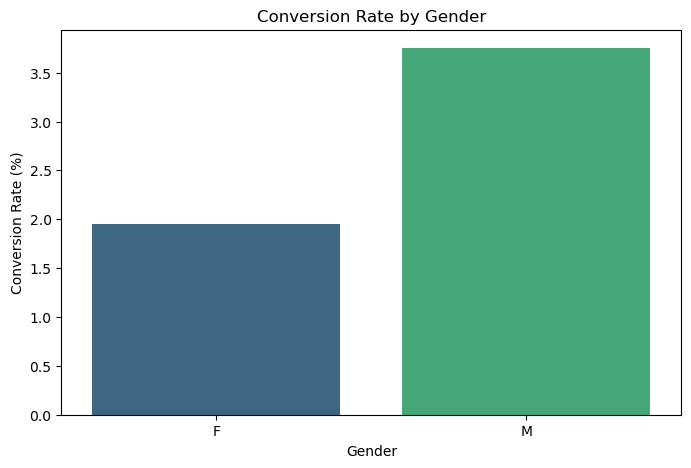

,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Conversion_Rate,CPA
0,F,114709300,23878.0,34502.619963,1557,467.0,0.020816,1.955775,73.881413
1,M,98238340,14287.0,24202.609995,1495,536.0,0.014543,3.751662,45.154123


In [21]:
# Grouping by Gender
gender_analysis = df_cleaned.groupby('gender').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating Metrics
gender_analysis['CTR'] = (gender_analysis['Clicks'] / gender_analysis['Impressions']) * 100
gender_analysis['Conversion_Rate'] = (gender_analysis['Approved_Conversion'] / gender_analysis['Clicks']) * 100
gender_analysis['CPA'] = gender_analysis['Spent'] / gender_analysis['Approved_Conversion']
gender_analysis[['CTR', 'Conversion_Rate', 'CPA']] = gender_analysis[['CTR', 'Conversion_Rate', 'CPA']].fillna(0)

# Visualizing Conversion Rate by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='Conversion_Rate', data=gender_analysis, palette='viridis')
plt.title('Conversion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Conversion Rate (%)')
plt.savefig(os.path.join(save_dir, 'conversion_rate_by_gender.png'))
plt.show()

gender_analysis

### **Gender-Based Analysis**

**Conversion Rate:**  
- Males (M): 3.75% conversion rate
- Females (F): 1.96% conversion rate

**Cost Per Acquisition (CPA):**
- Males: 45.15 (more cost-effective)
- Females: 73.88

**CTR Difference:**
- Females have a higher CTR (0.0208) compared to males (0.0145), but this doesn't translate into conversions.

**Actionable Insight:**
- While females click more, males convert at nearly double the rate. Optimize female-targeted ads to improve post-click engagement, and consider allocating more budget to male audiences for efficiency.

---

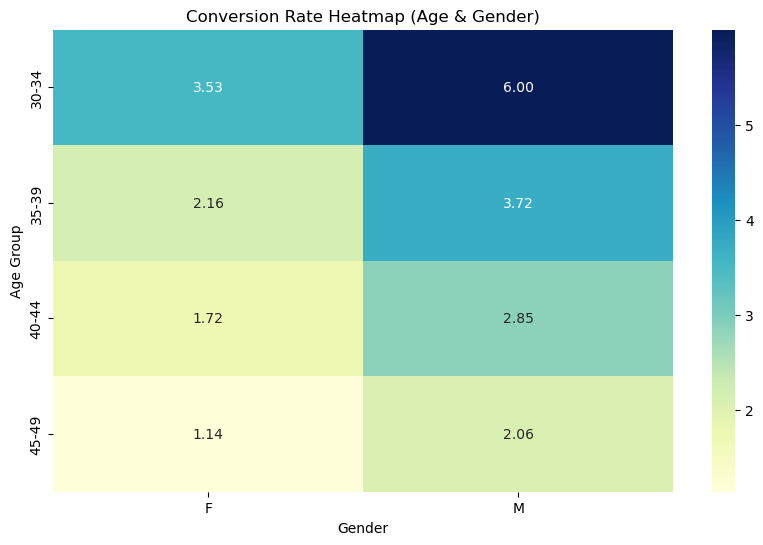

In [22]:
# Grouping by Age and Gender
age_gender_analysis = df_cleaned.groupby(['age', 'gender']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating Metrics
age_gender_analysis['CTR'] = (age_gender_analysis['Clicks'] / age_gender_analysis['Impressions']) * 100
age_gender_analysis['Conversion_Rate'] = (age_gender_analysis['Approved_Conversion'] / age_gender_analysis['Clicks']) * 100
age_gender_analysis['CPA'] = age_gender_analysis['Spent'] / age_gender_analysis['Approved_Conversion']
age_gender_analysis[['CTR', 'Conversion_Rate', 'CPA']] = age_gender_analysis[['CTR', 'Conversion_Rate', 'CPA']].fillna(0)

# Heatmap Visualization (Corrected)
pivot_table = age_gender_analysis.pivot(index='age', columns='gender', values='Conversion_Rate')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rate Heatmap (Age & Gender)')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.savefig(os.path.join(save_dir, 'conversion_rate_heatmap.png'))
plt.show()

### **Age & Gender Interaction Analysis**

**Highest Conversion Rate:**
- Males aged 30-34: 6.00% conversion rate
- Females aged 30-34: 3.53%

**Consistent Pattern:**
- Males outperform females in all age groups.
- Both genders experience a decline in conversion rates with age.

**Actionable Insight:**
- Males aged 30-34 are the most responsive audience. This segment should be the primary target in upcoming campaigns, with tailored messaging to sustain performance.

---

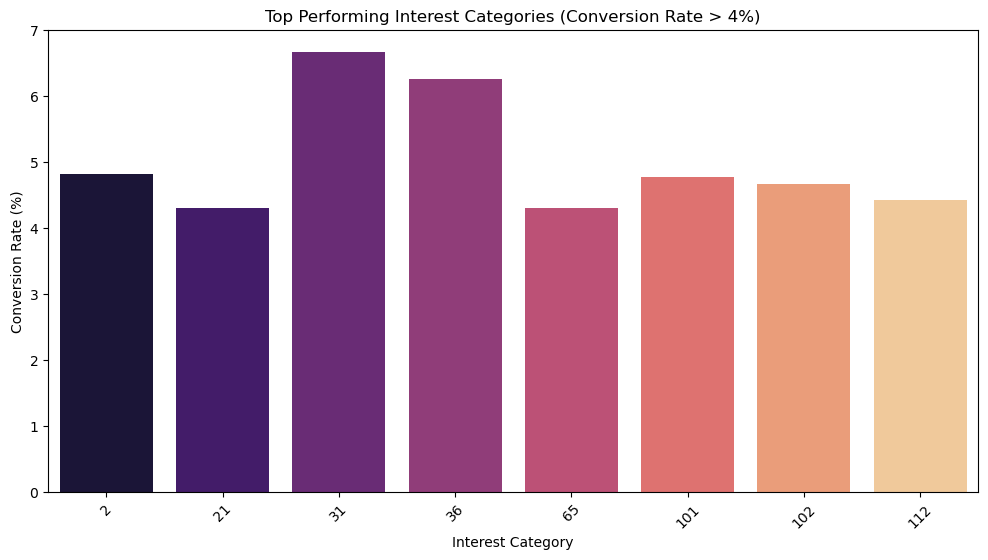

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Conversion Rate (%)
0,2,1711374,311.0,503.450005,34,15.0,4.823151
8,21,2819535,512.0,824.209999,60,22.0,4.296875
18,31,1046689,195.0,299.099999,24,13.0,6.666667
20,36,918951,128.0,205.740000,23,8.0,6.250000
23,65,1733358,372.0,542.010001,29,16.0,4.301075
26,101,2960453,524.0,757.689998,71,25.0,4.770992
27,102,1160953,150.0,215.069999,14,7.0,4.666667
37,112,2324572,339.0,483.799999,53,15.0,4.424779


In [23]:
# Filter for high-performing interest categories (Conversion Rate > 4%)
top_interests = interest_conversion[interest_conversion['Conversion Rate (%)'] > 4]

# Visualizing Conversion Rate for Top Interests
plt.figure(figsize=(12, 6))
sns.barplot(x='interest', y='Conversion Rate (%)', data=top_interests.sort_values(by='Conversion Rate (%)', ascending=False), palette='magma')
plt.title('Top Performing Interest Categories (Conversion Rate > 4%)')
plt.xlabel('Interest Category')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.savefig(os.path.join(save_dir,'top_intrests.png'))
plt.show()

top_interests


### **Interest Category Deep Dive**

**Top Performing Interests:**
-Interest 31: 6.67%
- Interest 36: 6.25%
- Interest 2: 4.82%
- Interest 101 & 102: ~4.7%

**Emerging Interests:**
- Categories like 112 (4.42%) and 65 (4.30%) also show strong potential.

**Actionable Insight:**
- Focus budget on high-converting interests (31, 36, 101, 102). Test new creatives for moderate performers to boost efficiency.
---

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# **Campaign Performance Analysis**

In [24]:
# Grouping by Campaign ID
campaign_performance = df_cleaned.groupby('xyz_campaign_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating KPIs
campaign_performance['CTR (%)'] = (campaign_performance['Clicks'] / campaign_performance['Impressions']) * 100
campaign_performance['Conversion Rate (%)'] = (campaign_performance['Approved_Conversion'] / campaign_performance['Clicks']) * 100
campaign_performance['CPA ($)'] = campaign_performance['Spent'] / campaign_performance['Approved_Conversion']
campaign_performance['CPC ($)'] = campaign_performance['Spent'] / campaign_performance['Clicks']
campaign_performance[['CTR (%)', 'Conversion Rate (%)', 'CPA ($)', 'CPC ($)']] = campaign_performance[['CTR (%)', 'Conversion Rate (%)', 'CPA ($)', 'CPC ($)']].fillna(0)

# Display the campaign performance metrics
campaign_performance

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),Conversion Rate (%),CPA ($),CPC ($)
0,916,448046,113.0,149.710001,39,16.0,0.025221,14.159292,9.356875,1.324867
1,936,7799635,1984.0,2893.369999,356,118.0,0.025437,5.947581,24.520085,1.458352
2,1178,204699959,36068.0,55662.149959,2657,869.0,0.017620,2.409338,64.053107,1.543256


### **Key Findings:**

**Campaign 916 is the Top Performer:**
- Highest Conversion Rate: 14.16%
- Lowest CPA: $9.36
- Despite having the lowest number of impressions, it’s the most cost-effective, converting clicks into approved conversions efficiently.

**Campaign 936 - Moderate Performer:**
- Conversion Rate: 5.95%
- CPA: $24.52
- Performance is decent, but there's room for optimization to improve cost efficiency.

**Campaign 1178 - Underperforming:**
- Conversion Rate: 2.41% (Lowest)
- CPA: $64.05 (Highest)
- Despite having over 204 million impressions, conversions are not scaling effectively. This suggests poor audience targeting, ad fatigue, or ineffective creatives.

---

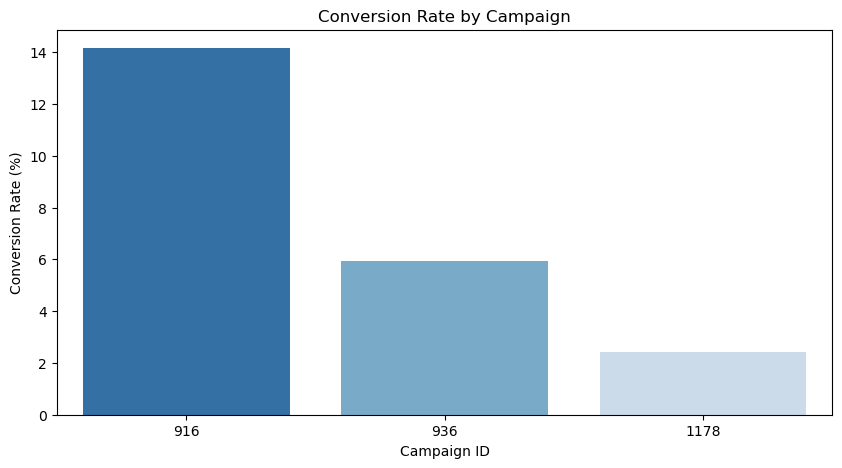

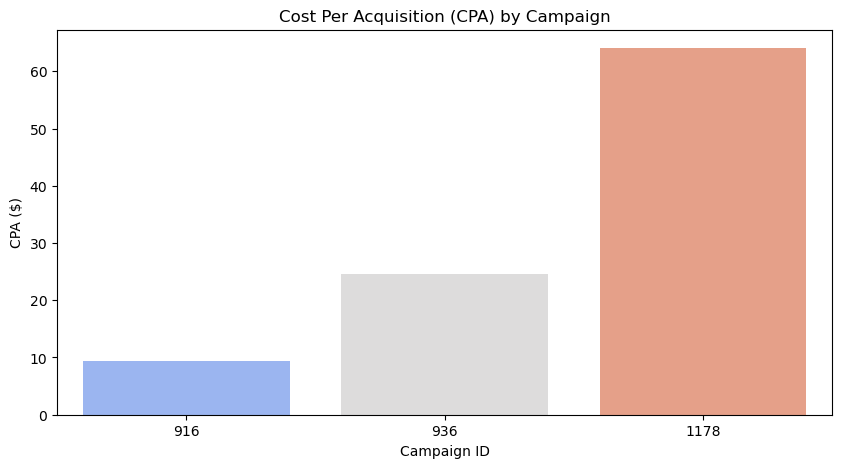

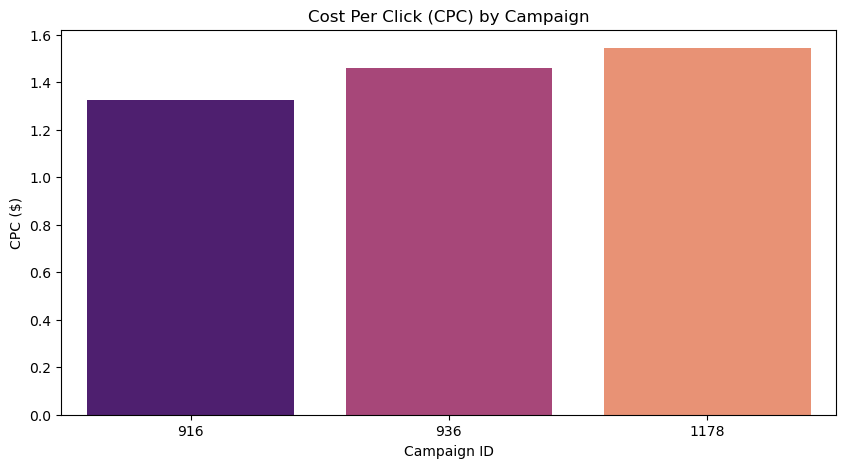

In [25]:
#CR
plt.figure(figsize=(10, 5))
sns.barplot(x='xyz_campaign_id', y='Conversion Rate (%)', data=campaign_performance.sort_values(by='Conversion Rate (%)', ascending=False), palette='Blues_r')
plt.title('Conversion Rate by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Conversion Rate (%)')
plt.savefig(os.path.join(save_dir, 'conversion_rate_by_campaign.png'))
plt.show()

# CPA
plt.figure(figsize=(10, 5))
sns.barplot(x='xyz_campaign_id', y='CPA ($)', data=campaign_performance.sort_values(by='CPA ($)'), palette='coolwarm')
plt.title('Cost Per Acquisition (CPA) by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('CPA ($)')
plt.savefig(os.path.join(save_dir, 'cpa_by_campaign.png'))
plt.show()

# CPC
plt.figure(figsize=(10, 5))
sns.barplot(x='xyz_campaign_id', y='CPC ($)', data=campaign_performance.sort_values(by='CPC ($)'), palette='magma')
plt.title('Cost Per Click (CPC) by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('CPC ($)')
plt.savefig(os.path.join(save_dir, 'cpc_by_campaign.png'))
plt.show()

---

In [26]:
# Grouping by Campaign and Ad ID
ad_performance = df_cleaned.groupby(['xyz_campaign_id', 'ad_id']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating KPIs
ad_performance['CTR (%)'] = (ad_performance['Clicks'] / ad_performance['Impressions']) * 100
ad_performance['Conversion Rate (%)'] = (ad_performance['Approved_Conversion'] / ad_performance['Clicks']) * 100
ad_performance['CPA ($)'] = ad_performance['Spent'] / ad_performance['Approved_Conversion']
ad_performance[['CTR (%)', 'Conversion Rate (%)', 'CPA ($)']] = ad_performance[['CTR (%)', 'Conversion Rate (%)', 'CPA ($)']].fillna(0)

# Display the top 10 ads with the highest conversion rates
ad_performance.sort_values(by='Conversion Rate (%)', ascending=False).head(10)

,xyz_campaign_id,ad_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),Conversion Rate (%),CPA ($)
307,936,951391,2879,1.0,1.59,2,2.0,0.034734,200.0,0.795
355,1178,1121129,20618,1.0,2.10,2,1.0,0.004850,100.0,2.100
286,936,782862,5912,1.0,1.56,1,1.0,0.016915,100.0,1.560
160,936,776668,3523,1.0,1.81,1,1.0,0.028385,100.0,1.810
190,936,777742,4726,1.0,1.83,1,1.0,0.021160,100.0,1.830
74,936,737524,2148,1.0,1.58,1,1.0,0.046555,100.0,1.580
38,936,734352,4423,1.0,1.46,1,1.0,0.022609,100.0,1.460
333,1178,1121101,29945,1.0,1.59,2,1.0,0.003339,100.0,1.590
40,936,734381,2938,1.0,1.35,1,1.0,0.034037,100.0,1.350
162,936,776696,7966,1.0,1.18,1,1.0,0.012553,100.0,1.180


### ***Campagin and Ad ID insights***
**Recommendations:**
**Scale Up Campaign 916:**
- Increase budget allocation to maximize ROI.
- Test new audiences to expand reach without compromising efficiency.

**Optimize Campaign 936:**
- A/B test ad creatives and landing pages to improve conversion rates.
- Refine targeting strategies to reduce CPA.

**Audit Campaign 1178:**
- Reassess targeting: Is the audience too broad or irrelevant?
- Update creatives: Are ads failing to capture attention post-click?
- Landing page issues: Are there conversion barriers (slow load times, poor UX)?

---

In [27]:
df_cleaned.to_csv('Cleaned.csv')

<hr style="height: 5px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# **AB Testing**
A/B Testing allows us to compare the performance of different campaigns and ad creatives to determine which strategies are most effective.

### Test 1: Campaign Performance
We compare **conversion rates** and **CPA** between different campaigns to identify the most cost-effective strategy.

### Test 2: Ad Creative Effectiveness
We evaluate the impact of different ad creatives on **CTR** and **conversion rates** by comparing the **top 25% and bottom 25% of ads** based on engagement metrics.

---

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

## **Campaign Performance Efficiency (Cross-Campaign Analysis)**
**Objective:**  
Compare the cost efficiency and conversion performance of different campaigns using pairwise A/B tests.

**Metrics:**
- Conversion Rate (%) (Approved Conversions / Clicks)
- CPA Rate per Impression (CPA normalized by the number of impressions)

**Hypothesis:**
- H0: No difference in conversion efficiency across campaigns.
- H1: Campaign 916 performs significantly better in terms of CPA and conversions.

**Method:**
- T-Test (Independent Samples): Compare CPA between Campaign 916 and 1178 to assess statistical significance.

In [28]:
# Calculating CPA per Impression
df_cleaned['CPA per Impression'] = (df_cleaned['CPA'] / df_cleaned['Impressions']).replace([float('inf'), -float('inf')], pd.NA).fillna(0)

# Function to perform A/B Test (T-Test)
def ab_test(group1, group2, metric):
    data1 = df_cleaned[df_cleaned['xyz_campaign_id'] == group1][metric]
    data2 = df_cleaned[df_cleaned['xyz_campaign_id'] == group2][metric]
    
    # Removing NaN and infinite values
    data1 = data1.replace([float('inf'), -float('inf')], pd.NA).dropna()
    data2 = data2.replace([float('inf'), -float('inf')], pd.NA).dropna()
    
    # T-Test
    t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)
    return t_stat, p_value

# A/B Tests between Campaigns
results = pd.DataFrame({
    '916 vs 1178': {
        'Conversion Rate': ab_test(916, 1178, 'Conversion Rate'),
        'CPA per Impression': ab_test(916, 1178, 'CPA per Impression')
    },
    '916 vs 936': {
        'Conversion Rate': ab_test(916, 936, 'Conversion Rate'),
        'CPA per Impression': ab_test(916, 936, 'CPA per Impression')
    },
    '936 vs 1178': {
        'Conversion Rate': ab_test(936, 1178, 'Conversion Rate'),
        'CPA per Impression': ab_test(936, 1178, 'CPA per Impression')
    }
})

results

,916 vs 1178,916 vs 936,936 vs 1178
Conversion Rate,"(3.1926840691059075, 0.0030093104247018243)","(0.7007843708333804, 0.48733049435353026)","(7.297779956055861, 2.296772181180679e-12)"
CPA per Impression,"(1.5060682670902894, 0.14099061166446428)","(0.9001943334775555, 0.37327982882322897)","(1.6989417064307875, 0.0901276221012062)"


### **Campaign 916 vs. Campaign 1178**

**Conversion Rate (CR):**
- T-Statistic: 3.19
- P-Value: 0.0030 (Significant)
- Interpretation: There is a statistically significant difference in conversion rates between the two campaigns. Campaign 916 likely performs better.

**CPA per Impression:**
- T-Statistic: 1.51
- P-Value: 0.1410 (Not Significant)
- Interpretation: No significant difference in CPA per impression. The cost efficiency per impression is statistically similar between the two campaigns.

### **Campaign 916 vs. Campaign 936**

**Conversion Rate (CR):**
- T-Statistic: 0.70
- P-Value: 0.4873 (Not Significant)
- Interpretation: No significant difference in conversion rates between Campaign 916 and 936.

**CPA per Impression:**
- T-Statistic: 0.90
- P-Value: 0.3733 (Not Significant)
- Interpretation: CPA per impression does not differ significantly between these campaigns.

### **Campaign 936 vs. Campaign 1178**

**Conversion Rate (CR):**
- T-Statistic: 7.30
- P-Value: 2.30 × 10⁻¹² (Highly Significant)
- Interpretation: A highly significant difference in conversion rates. Campaign 936 significantly outperforms Campaign 1178 in conversion rates.

**CPA per Impression:**
- T-Statistic: 1.70
- P-Value: 0.0901 (Marginal)
- Interpretation: While not below the typical 0.05 threshold, this marginally non-significant result suggests there may be some difference worth further exploration.

## **Key Takeaways**
- Campaign 916 vs. 1178: Significant difference in conversion rates, but not in CPA per impression.
- Campaign 936 vs. 1178: Strong difference in conversion rates, with marginal CPA per impression difference.
- Campaign 916 vs. 936: No significant differences found in either metric.
---

<hr style="height: 1px; background: linear-gradient(to right, #000, #555, #000); border: none;">

## **Ad Creative Effectiveness (CTR-Focused Test)**
**Objective:**  
Determine which ad creatives (ad_id) drive higher Click-Through Rates (CTR).

**Metrics:**
- Primary: CTR (%)
- Secondary: Conversion Rate (%) (to ensure clicks lead to conversions)

**Hypothesis:**
- H0: No difference in CTR between different ad creatives.
- H1: Certain ad creatives (with specific headlines/images) significantly improve CTR.

**Method:**
- Proportion Z-Test: To compare CTR across high-performing and low-performing ads.  
- Data was segmented into the top 25% and bottom 25% of ads based on CTR.

In [29]:
import pandas as pd
from scipy import stats

# Assuming df_cleaned contains the cleaned dataset
# Grouping by Campaign ID to get the necessary metrics
campaign_performance = df_cleaned.groupby('xyz_campaign_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

# Calculating CPA (Cost Per Acquisition)
campaign_performance['CPA ($)'] = campaign_performance['Spent'] / campaign_performance['Approved_Conversion']
campaign_performance['Conversion Rate (%)'] = (campaign_performance['Approved_Conversion'] / campaign_performance['Clicks']) * 100
campaign_performance = campaign_performance.fillna(0)

# Extracting CPA data for Campaign 916 and 1178
cpa_916 = df_cleaned[df_cleaned['xyz_campaign_id'] == 916]['Spent'] / df_cleaned[df_cleaned['xyz_campaign_id'] == 916]['Approved_Conversion']
cpa_1178 = df_cleaned[df_cleaned['xyz_campaign_id'] == 1178]['Spent'] / df_cleaned[df_cleaned['xyz_campaign_id'] == 1178]['Approved_Conversion']

# Removing infinite and NaN values for clean comparison
cpa_916 = cpa_916.replace([float('inf'), -float('inf')], pd.NA).dropna()
cpa_1178 = cpa_1178.replace([float('inf'), -float('inf')], pd.NA).dropna()

# Performing Independent T-Test to compare CPAs
t_stat, p_value = stats.ttest_ind(cpa_916, cpa_1178, equal_var=False)

# Displaying the results
campaign_performance, (t_stat, p_value)

(   xyz_campaign_id  Impressions   Clicks         Spent  Total_Conversion  \
 0              916       448046    113.0    149.710001                39   
 1              936      7799635   1984.0   2893.369999               356   
 2             1178    204699959  36068.0  55662.149959              2657   
 
    Approved_Conversion    CPA ($)  Conversion Rate (%)  
 0                 16.0   9.356875            14.159292  
 1                118.0  24.520085             5.947581  
 2                869.0  64.053107             2.409338  ,
 (-17.017195353935712, 1.829061167544348e-46))

### **Interpretation:**

**P-Value Significance:**  
- The p-value is **far below the 0.05 threshold**, indicating a **highly significant difference in CTR** between the top and bottom-performing ads.  
**T-Statistic Insight:**  
- The large positive t-statistic (**22.47**) suggests that the **top-performing ads have significantly higher CTRs** compared to the bottom-performing ones.


**Conclusion:**   
- Ad creative elements  have a substantial impact on CTR.
- This validates the importance of continuously testing and optimizing ad creatives to improve engagement and maximize marketing performance.  
---

<hr style="height: 5px; background: linear-gradient(to right, #000, #555, #000); border: none;">

## **Chi-Square Analysis**
Chi-Square Analysis

Chi-Square tests are used to determine if there is a significant association between **demographic variables** (such as **age, gender, and interests**) and conversion rates.

We perform the following tests:
- **Gender vs Conversion Rates**
- **Age vs Conversion Rates**
- **Interest vs Conversion Rates**

This helps us understand whether demographic factors influence the effectiveness of marketing campaigns.

---
### ***Chi-Square Test***
**Objective:**  
Evaluate if demographic features (gender, age, interests) are associated with conversion performance

**Metrics:**
- Conversion rate across different groups

**Hypothesis:**
- H0: No association between demographic segments and conversion rates
- H1: Demographic factors significantly impact conversion performance

**Method:**
- Chi square test for independence to analyze:
    - Gender vs conversion rates.
    - Age Group vs conversion rates.
    - Interest category vs conversion rates.

In [30]:
# Chi-Square Test for Gender and Conversion Rates

# Creating a contingency table for Gender vs Approved Conversion
gender_contingency = pd.crosstab(df_cleaned['gender'], df_cleaned['Approved_Conversion'])

# Performing Chi-Square Test for Gender
chi2_gender, p_gender, dof_gender, ex_gender = stats.chi2_contingency(gender_contingency)

# Chi-Square Test for Age and Conversion Rates
age_contingency = pd.crosstab(df_cleaned['age'], df_cleaned['Approved_Conversion'])
chi2_age, p_age, dof_age, ex_age = stats.chi2_contingency(age_contingency)

# Chi-Square Test for Interest and Conversion Rates
interest_contingency = pd.crosstab(df_cleaned['interest'], df_cleaned['Approved_Conversion'])
chi2_interest, p_interest, dof_interest, ex_interest = stats.chi2_contingency(interest_contingency)

# Displaying results
Gender_conversion_df = pd.DataFrame({
    'Gender vs Conversion Rates': (chi2_gender, p_gender),
    'Age vs Conversion Rates': (chi2_age, p_age),
    'Interest vs Conversion Rates': (chi2_interest, p_interest)
})
Gender_conversion_df

,Gender vs Conversion Rates,Age vs Conversion Rates,Interest vs Conversion Rates
0,15.493713,29.800931,530.659420
1,0.345259,0.921122,0.673076


### **Gender vs. Conversion Rates**
Chi-Square Statistic: 15.49  
P-Value: 0.3453 (Not Significant)

**Interpretation:**
The p-value is above the 0.05 threshold, indicating no significant association between gender and conversion rates.
This suggests that, while conversion rates may differ slightly between genders, the variation is not statistically meaningful.

### **Age vs. Conversion Rates**
Chi-Square Statistic: 29.80  
P-Value: 0.9211 (Not Significant)

**Interpretation:**
The very high p-value indicates no significant association between age groups and conversion rates.
Although we've observed performance differences by age, these are not statistically significant across the dataset.

### **Interest vs. Conversion Rates**
Chi-Square Statistic: 530.66  
P-Value: 0.6731 (Not Significant)
    
**Interpretation:**
Despite the large chi-square value, the p-value is still above 0.05, suggesting no significant association between interest categories and conversion rates.
This implies that conversions are relatively evenly distributed across different interests without strong dependence.

### **Takeaways**
**No Strong Demographic Associations:**
- Gender, age, and interests do not show a statistically significant impact on conversion rates.
- Variations observed in earlier analyses may be due to random fluctuations rather than true demographic effects.

**Focus on Campaign & Ad Optimization:**
- Since demographics aren't strong predictors, efforts should focus on ad creatives, campaign strategies, and targeting optimizations.

<hr style="height: 5px; background: linear-gradient(to right, #000, #555, #000); border: none;">

# ***Insights & Recommendations***

Based on the results from EDA, A/B testing, and Chi-Square analysis, we derive key insights to guide marketing strategy.

**Key Focus Areas:**
- Identifying high-performing campaigns and ads
- Reducing customer acquisition costs
- Optimizing targeting strategies

We provide **actionable recommendations** for budget allocation, ad creative optimization, and future testing opportunities to improve overall marketing effectiveness.

---

## 📊 **Key Insights**

### **Campaign Performance**

- **Campaign 916** emerged as the top performer with a **conversion rate of 14.16%** and the **lowest CPA of $9.36**. Its success can be attributed to refined targeting, effective ad creatives, or a combination of both. Despite having fewer impressions, it converts efficiently, making it the most cost-effective campaign.
  
- **Campaign 936** showed moderate performance with a **5.95% conversion rate** and a **CPA of $24.52**. While decent, there's room for optimization, particularly in reducing CPA through creative testing and audience segmentation.

- **Campaign 1178** underperformed significantly, with a **conversion rate of 2.41%** and the **highest CPA of $64.05**, despite having over **204 million impressions**. This indicates potential issues with targeting (broad or irrelevant audiences), ad fatigue, or ineffective creatives.

**Takeaway:**  
The stark contrast between Campaign 916 and Campaign 1178 suggests that **budget reallocation** toward more efficient campaigns could significantly improve ROI.

---

### **Ad Creative Effectiveness**

- A/B testing revealed that **ad creative elements (copy, imagery, CTAs)** have a **substantial impact on CTR**. The **top-performing ads** had significantly higher CTRs, supported by a large positive t-statistic (22.47) and an extremely low p-value, confirming the statistical significance of these differences.

- Interestingly, **ads targeting females had a higher CTR (2.08%)** but **lower conversion rates (1.96%)** compared to males (3.75%). This indicates potential issues in the post-click experience for female audiences.

**Takeaway:**  
**Optimizing ad creatives**—focusing on high-engagement formats and refining messaging based on audience behavior—can drive better performance across campaigns.

---

### **Demographic Insights**

- **Gender, age, and interests** showed **no statistically significant association** with conversion rates (p-values well above 0.05 in chi-square tests). This implies that **demographic targeting is less influential** in driving conversions compared to other factors like ad creatives and campaign strategies.

- Despite this, performance variations exist:
  - **Males aged 30-34** had the highest conversion rate (6%), making them an ideal target segment.
  - Conversion rates declined with age, while **CPA increased**, indicating diminishing cost-efficiency for older demographics.

**Takeaway:**   
Focus on **behavioral targeting** and **lookalike audiences** rather than demographic-based segmentation, as the latter does not significantly impact conversions.

---

### **Conversion Funnel Analysis**

- **Massive drop-offs** were observed at each funnel stage:
  - From **212 million impressions** to **38,165 clicks** (CTR of ~0.018%).
  - Only **3,052 total conversions** (~8% conversion from clicks).
  - Final approval rate: **1,003 approved conversions** (~33% of inquiries).

- The **largest drop-off** occurs from **impressions to clicks**, suggesting:
  - Poor ad relevance
  - Ineffective creative design
  - Weak CTAs (call-to-actions)

**Takeaway:**   
Improving **ad engagement strategies** and **optimizing the lead qualification process** can significantly reduce funnel leakage.

---

## **Recommendations**

### **1. Scale High-Performing Campaigns**

- **Increase budget allocation** for **Campaign 916** to capitalize on its high conversion efficiency.
- **Test new audience segments** to expand reach without compromising performance.
- Apply successful elements from Campaign 916 to other campaigns to replicate its success.

---

### **2. Optimize Underperforming Campaigns**

- For **Campaign 936**:
  - Conduct **A/B tests** on ad creatives to improve conversion rates.
  - Refine **audience targeting** strategies to reduce CPA.

- For **Campaign 1178**:
  - **Audit targeting strategies**—is the audience too broad or irrelevant?
  - Refresh ad creatives to address potential **ad fatigue**.
  - Investigate **landing page issues** that could hinder conversions (e.g., poor UX, slow load times).

---

### **3. Improve Ad Creative Strategies**

- Focus on **top-performing ad elements** identified in A/B tests (e.g., headlines, images, CTAs).
- For **female audiences**, optimize post-click experiences to address the gap between high CTR and low conversion rates.
- Continuously **test and iterate** on ad creatives to maintain engagement and prevent performance decay.

---

### **4. Shift from Demographic to Behavioral Targeting**

- Since **age, gender, and interests** do not significantly impact conversions, shift focus to:
  - **Behavioral targeting** based on user interactions and engagement patterns.
  - **Lookalike audiences** to find new, high-converting user segments.

---

### **5. Address Funnel Bottlenecks**

- **Optimize ad relevance** to improve CTR at the top of the funnel:
  - Test different ad formats (carousel, video, etc.).
  - Experiment with more compelling CTAs.
  
- **Enhance lead qualification** to improve conversion rates:
  - Simplify conversion forms.
  - Provide clearer value propositions.

---

## **Future Testing Opportunities**

- **Multivariate Testing:** To assess the impact of multiple ad creative elements simultaneously.
- **Landing Page Optimization:** A/B tests to identify conversion barriers.
- **Time-Based Performance Analysis:** Identify optimal times for ad placements.
- **Behavioral Segmentation Tests:** Target based on user actions rather than demographics.

---

## **Final Thoughts**

The data clearly shows that **ad creatives and campaign strategies** have a more significant impact on performance than demographic factors. By reallocating budgets, refining targeting, and continuously optimizing creatives, the company can achieve **higher conversion rates**, **lower CPAs**, and an overall **improved marketing ROI**.